### PHYS3600 Fall 2021 - Worksheet 1 - due September 29

#### Please upload to Blackboard the .ipynb file, containing your last name.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Jake Postiglione

In [208]:
import numpy as np
import matplotlib.pyplot as plt

1\. Form the following 2-D array, without typing it in explicitly: (hint: you can generate it as a 1D array and then use .reshape)

<br>
([[ 1,  4,  7], <br>
[ 10,  13, 16]])

In [209]:
linear_array = np.array([1, 4, 7, 10, 13, 16])
matrix = linear_array.reshape((2, 3))

print(matrix)

[[ 1  4  7]
 [10 13 16]]


2\. Form a new array that contains only the first two rows and columns of the one above.

In [210]:
sliced_array = matrix[0:2, 0:2]

print(sliced_array)

[[ 1  4]
 [10 13]]


3\. Define a function that takes as input two arrays a and b and
    1. Checks if they are of equal length and throws an error if they are not;
    2. Checks if all elements in a are > 0;
    3. Checks if any elements in b are < 0;
    4. Returns the logical AND of 2. and 3.

In [211]:
def arrayChecks(a: np.ndarray, b: np.ndarray):
    if a.size != b.size:
        return "Error: Length mismatch."

    return np.any((a > 0)) and np.any((b < 0))

4\. Create an array containing 26 random numbers between 0 and 1, find the largest value, and return the index of the minimum.

In [212]:
np.random.seed(26)

random_array = np.random.rand(26)

random_max = np.max(random_array)
index_min = np.argmin(random_array)

print(random_max)
print(index_min)


0.9957388974004195
23


5\. Read into a numpy array the data set "YaleTrigParallaxData.txt". 

This data set contains information, collected by the Hipparcos satellite, about the properties of about 6,000 stars in a star cluster. The data set has five columns: 

column 1: star ID number 

column 2: apparent V (visual) magnitude 

column 3: observed B-V color  

column 4: observed parallax (in arcsec) 

column 5: uncertainty in parallax (in milliarcsec) 


We are only interested in the appa7rent V magnitude, the parallax angle, which is inversely proportional to a star's distance, and the B-V color, which is the gradient of brightness in B band compared to V band.

In [213]:
parallax_array = np.loadtxt('YaleTrigParallaxData.txt', usecols=(1, 2, 3))

print(parallax_array)

[[ 4.610e+00  1.040e+00  1.350e-02]
 [ 8.450e+00  1.050e+00  7.170e-02]
 [ 9.010e+00  1.440e+00  8.860e-02]
 ...
 [ 6.120e+00  6.200e-01  3.340e-02]
 [ 1.433e+01 -7.000e-02  2.880e-02]
 [ 7.470e+00  5.500e-01  1.320e-02]]


6\. Define three arrays with the columns of interest (Visual Mag, B-V color, Parallax).

In [214]:
visual_mag = parallax_array[:, 0]
bv_color = parallax_array[:, 1]
parallax = parallax_array[:, 2]


7\. Calculate the shape of your array.

In [215]:
array_shape = parallax_array.shape

print(array_shape)

(6220, 3)


8\. Define a function, absolute magintude M, that calculates the star's absolute magnitude, a measure of luminosity, starting from V (the visual brightness) and the parallax P. The function should implement the following relationship:

M = V + 5 * (log$\_{10}$ (P) + 1)

Hint: To implement the base 10 log, you can use the function np.log10().

In [216]:
def absoluteMag(v, p):
    return v + 5 * (np.log10(p) + 1)

9\. Make a scatter plot that has B-V for the stars on the x axis (make sure you index your array correctly!), and their absolute magnitude (calculated using the function you just made) on the y axis. This is called a H-R diagram (Hertzsprung-Russell diagram). It encodes information about the temperature of stars (expressed by color, or B-V) and their luminosity. 

Add axes titles as appropriate.

Adjust axes limits to be [-0.3,2] for B-V, [-10, 20] for M.



[]

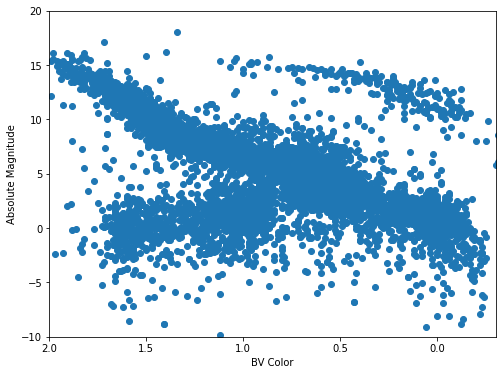

In [223]:
absolute_mag = np.array([absoluteMag(v, p) for v, p in zip(visual_mag, parallax)])

plt.figure(figsize=(8,6))
plt.xlabel('BV Color')
plt.ylabel('Absolute Magnitude')

plt.xlim([2, -0.3])
plt.ylim([-10, 20])

plt.scatter(bv_color, absolute_mag)

plt.plot()

10\. Visualize B-V as a histogram.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

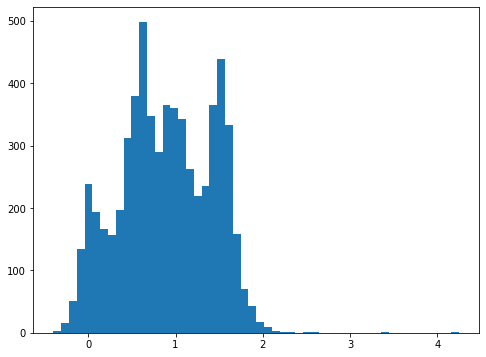

In [218]:
plt.figure(figsize=(8,6))
plt.hist(bv_color, bins="auto")
plt.plot

11\. For the B-V array, calculate its mean, median, and its standard deviation.


In [219]:
bv_mean = np.mean(bv_color)
bv_median = np.median(bv_color)
bv_deviation = np.std(bv_color)

print(bv_mean, bv_median, bv_deviation)

0.8865900321543408 0.89 0.524534271236194


Extra Credit: Add information to the plot in 9\. using colors and sizes. Re-make the above scatter plot with colors arranged according to Vmag, and another scatter plot where the size of the markers is proportional to the Vmag of each point.

[]

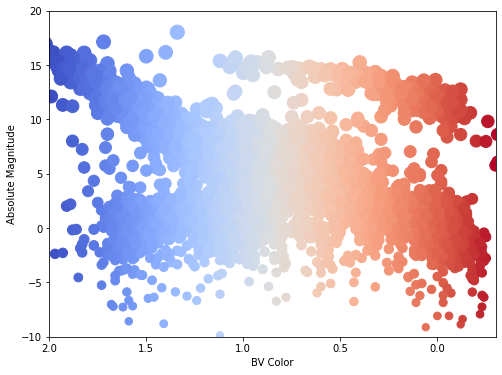

In [231]:
lerp = lambda v0, v1, interval: (1 - interval) * v0 + interval * v1

absolute_mag = np.array([absoluteMag(v, p) for v, p in zip(visual_mag, parallax)])
bv_clip = np.clip(bv_color, a_min=-0.3, a_max=2) # Clip values to properly map color gradient.

marker_size = np.array([lerp(48, 265, (a + 10) / 40) for a in absolute_mag])

plt.figure(figsize=(8,6))
plt.xlabel('BV Color')
plt.ylabel('Absolute Magnitude')

plt.xlim([2, -0.3])
plt.ylim([-10, 20])

plt.scatter(bv_color, absolute_mag, c=bv_clip, cmap="coolwarm_r", s=marker_size)

plt.plot()
